In [2]:
import numpy as np
import matplotlib as plt
%matplotlib inline

import os
from PIL import Image
from tensorflow import keras
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
im = Image.open('/content/drive/My Drive/final/train/mountain/6678.jpg')
print(im.format, im.size, im.mode)
im.show()

JPEG (150, 150) RGB


uint8
(150, 150, 3)


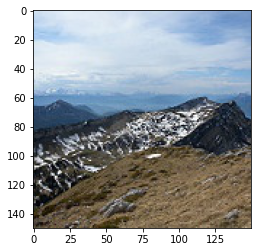

In [6]:
pix = np.array(im)

# load image as pixel array
data = plt.image.imread('/content/drive/My Drive/final/train/mountain/20052.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.pyplot.imshow(data)
plt.pyplot.show()

Make train, mini-train, test and mini test data sets. Mini sets have only 150 images.

In [7]:
types = ["buildings", "mountain", "forest", "glacier", "sea", "street"]
generic_path='/content/drive/My Drive/final/train/'

for t in types:
  print(t+":")
  data_list = []
  path=generic_path+t+'/'
  file_list = os.listdir(path)
  #file_list.sort()
  print(len(file_list))
  count=1
  for filename in file_list:
    #print(filename)
    #data = plt.image.imread(path+filename)
    pic=Image.open(path+filename)
    data=np.array(pic)
    if(len(data)==150 and len(data[0])==150): #some pictures are not 150x150, will just drop them.
      data_list.append(data)
    else:
      print(filename)
    count+=1
    if(count>=150):break
  print(len(data_list), len(data_list[0]), len(data_list[0][0]), len(data_list[0][0][0]))
  mini_train_data = np.array(data_list)
  print(mini_train_data.shape, "\n")
  np.save(generic_path+t+'_mini_train', mini_train_data)

buildings:
2191
149 150 150 3
(149, 150, 150, 3) 

mountain:
2512
149 150 150 3
(149, 150, 150, 3) 

forest:
2270
149 150 150 3
(149, 150, 150, 3) 

glacier:
2404
2837.jpg
3148.jpg
147 150 150 3
(147, 150, 150, 3) 

sea:
2274
341.jpg
148 150 150 3
(148, 150, 150, 3) 

street:
2390
149 150 150 3
(149, 150, 150, 3) 



Load all the boys instead of regenerating them every time, which would take 45 minutes or more.

In [8]:
buildings_train=np.load('/content/drive/My Drive/final/train/buildings_train.npy', allow_pickle=True)
forest_train=np.load('/content/drive/My Drive/final/train/forest_train.npy', allow_pickle=True)
glacier_train=np.load('/content/drive/My Drive/final/train/glacier_train.npy', allow_pickle=True)
mountain_train=np.load('/content/drive/My Drive/final/train/mountain_train.npy', allow_pickle=True)
sea_train=np.load('/content/drive/My Drive/final/train/sea_train.npy', allow_pickle=True)
street_train=np.load('/content/drive/My Drive/final/train/street_train.npy', allow_pickle=True)

buildings_mini_train=np.load('/content/drive/My Drive/final/train/buildings_mini_train.npy', allow_pickle=True)
forest_mini_train=np.load('/content/drive/My Drive/final/train/forest_mini_train.npy', allow_pickle=True)
glacier_mini_train=np.load('/content/drive/My Drive/final/train/glacier_mini_train.npy', allow_pickle=True)
mountain_mini_train=np.load('/content/drive/My Drive/final/train/mountain_mini_train.npy', allow_pickle=True)
sea_mini_train=np.load('/content/drive/My Drive/final/train/sea_mini_train.npy', allow_pickle=True)
street_mini_train=np.load('/content/drive/My Drive/final/train/street_mini_train.npy', allow_pickle=True)

buildings_test=np.load('/content/drive/My Drive/final/test/buildings_test.npy', allow_pickle=True)
forest_test=np.load('/content/drive/My Drive/final/test/forest_test.npy', allow_pickle=True)
glacier_test=np.load('/content/drive/My Drive/final/test/glacier_test.npy', allow_pickle=True)
mountain_test=np.load('/content/drive/My Drive/final/test/mountain_test.npy', allow_pickle=True)
sea_test=np.load('/content/drive/My Drive/final/test/sea_test.npy', allow_pickle=True)
street_test=np.load('/content/drive/My Drive/final/test/street_test.npy', allow_pickle=True)

buildings_mini_test=np.load('/content/drive/My Drive/final/test/buildings_mini_test.npy', allow_pickle=True)
forest_mini_test=np.load('/content/drive/My Drive/final/test/forest_mini_test.npy', allow_pickle=True)
glacier_mini_test=np.load('/content/drive/My Drive/final/test/glacier_mini_test.npy', allow_pickle=True)
mountain_mini_test=np.load('/content/drive/My Drive/final/test/mountain_mini_test.npy', allow_pickle=True)
sea_mini_test=np.load('/content/drive/My Drive/final/test/sea_mini_test.npy', allow_pickle=True)
street_mini_test=np.load('/content/drive/My Drive/final/test/street_mini_test.npy', allow_pickle=True)

print("main train sets", buildings_train.shape, forest_train.shape, glacier_train.shape, mountain_train.shape, sea_train.shape, street_train.shape)
train_lengths = [len(buildings_train), len(forest_train), len(glacier_train), len(mountain_train), len(sea_train), len(street_train)]

print("mini train sets", buildings_mini_train.shape, forest_mini_train.shape, glacier_mini_train.shape, mountain_mini_train.shape, sea_mini_train.shape, street_mini_train.shape)

print("main test sets", buildings_test.shape, forest_test.shape, glacier_test.shape, mountain_test.shape, sea_test.shape, street_test.shape)

print("mini test sets", buildings_mini_test.shape, forest_mini_test.shape, glacier_mini_test.shape, mountain_mini_test.shape, sea_mini_test.shape, street_mini_test.shape)

main train sets (2190, 150, 150, 3) (2263, 150, 150, 3) (2387, 150, 150, 3) (2495, 150, 150, 3) (2270, 150, 150, 3) (2389, 150, 150, 3)
mini train sets (149, 150, 150, 3) (149, 150, 150, 3) (147, 150, 150, 3) (149, 150, 150, 3) (148, 150, 150, 3) (149, 150, 150, 3)
main test sets (437, 150, 150, 3) (473, 150, 150, 3) (549, 150, 150, 3) (523, 150, 150, 3) (510, 150, 150, 3) (501, 150, 150, 3)
mini test sets (149, 150, 150, 3) (149, 150, 150, 3) (147, 150, 150, 3) (149, 150, 150, 3) (149, 150, 150, 3) (149, 150, 150, 3)


In [9]:
train_x = np.concatenate((buildings_train, forest_train, glacier_train, mountain_train, sea_train, street_train))

mini_train_x = np.concatenate((buildings_mini_train, forest_mini_train, glacier_mini_train, mountain_mini_train, sea_mini_train, street_mini_train))

test_x = np.concatenate((buildings_test, forest_test, glacier_test, mountain_test, sea_test, street_test))

mini_test_x = np.concatenate((buildings_mini_test, forest_mini_test, glacier_mini_test, mountain_mini_test, sea_mini_test, street_mini_test))

print(train_x.shape)
print(mini_train_x.shape)
print(test_x.shape)
print(mini_test_x.shape)

(13994, 150, 150, 3)
(891, 150, 150, 3)
(2993, 150, 150, 3)
(892, 150, 150, 3)


yucky code below pls wash eyes and hands afterwards

In [10]:
train_y=[]
for i in range(len(train_x)):
  y=[i<len(buildings_train), 
     len(buildings_train)<=i<len(buildings_train)+len(forest_train),
     len(buildings_train)+len(forest_train)<=i< len(buildings_train)+len(forest_train)+len(glacier_train),
     len(buildings_train)+len(forest_train)+len(glacier_train)<=i<len(buildings_train)+len(forest_train)+len(glacier_train)+len(mountain_train),
     len(buildings_train)+len(forest_train)+len(glacier_train)+len(mountain_train)<=i<len(buildings_train)+len(forest_train)+len(glacier_train)+len(mountain_train)+len(sea_train),
     i>=len(buildings_train)+len(forest_train)+len(glacier_train)+len(mountain_train)+len(sea_train)]
  train_y.append(y)
train_y=np.array(train_y)

mini_train_y=[]
for i in range(len(mini_train_x)):
  y=[i<len(buildings_train), 
     len(buildings_mini_train)<=i<len(buildings_mini_train)+len(forest_mini_train),
     len(buildings_mini_train)+len(forest_mini_train)<=i< len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train),
     len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train)<=i<len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train)+len(mountain_mini_train),
     len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train)+len(mountain_mini_train)<=i<len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train)+len(mountain_mini_train)+len(sea_mini_train),
     i>=len(buildings_mini_train)+len(forest_mini_train)+len(glacier_mini_train)+len(mountain_mini_train)+len(sea_mini_train)]
  mini_train_y.append(y)
mini_train_y=np.array(mini_train_y)

test_y=[]
for i in range(len(test_x)):
  y=[i<len(buildings_test), 
     len(buildings_test)<=i<len(buildings_test)+len(forest_test),
     len(buildings_test)+len(forest_test)<=i< len(buildings_test)+len(forest_test)+len(glacier_test),
     len(buildings_test)+len(forest_test)+len(glacier_test)<=i<len(buildings_test)+len(forest_test)+len(glacier_test)+len(mountain_test),
     len(buildings_test)+len(forest_test)+len(glacier_test)+len(mountain_test)<=i<len(buildings_test)+len(forest_test)+len(glacier_test)+len(mountain_test)+len(sea_test),
     i>=len(buildings_test)+len(forest_test)+len(glacier_test)+len(mountain_test)+len(sea_test)]
  test_y.append(y)
test_y=np.array(test_y)

mini_test_y=[]
for i in range(len(mini_test_x)):
  y=[i<len(buildings_mini_test), 
     len(buildings_mini_test)<=i<len(buildings_mini_test)+len(forest_mini_test),
     len(buildings_mini_test)+len(forest_mini_test)<=i< len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test),
     len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test)<=i<len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test)+len(mountain_mini_test),
     len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test)+len(glacier_mini_test)<=i<len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test)+len(glacier_mini_test)+len(sea_mini_test),
     i>=len(buildings_mini_test)+len(forest_mini_test)+len(glacier_mini_test)+len(glacier_mini_test)+len(sea_mini_test)]
  mini_test_y.append(y)
mini_test_y=np.array(mini_test_y)

print(train_y.shape)
print(mini_train_y.shape)
print(test_y.shape)
print(mini_test_y.shape)

(13994, 6)
(891, 6)
(2993, 6)
(892, 6)


All np arrays have to dtypes.int32 not dtype tf.uint8

In [11]:
tf.cast(train_x, tf.int32)
tf.cast(train_y, tf.int32)
#np.reshape(train_y, (97958,))

tf.cast(mini_train_x, tf.int32)
tf.cast(mini_train_y, tf.int32)
#np.reshape(mini_train_y, (20916, ))

tf.cast(test_x, tf.int32)
tf.cast(test_y, tf.int32)
#np.reshape(test_y, (20951, ))

tf.cast(mini_test_x, tf.int32)
tf.cast(mini_test_y, tf.int32)
#np.reshape(mini_test_y, (6244, ))

<tf.Tensor: shape=(892, 6), dtype=int32, numpy=
array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=int32)>

In [12]:
print("main training")
print(train_x.shape)
print(train_y.shape)

print("mini training")
print(mini_train_x.shape)
print(mini_train_y.shape)

print("main testing")
print(test_x.shape)
print(test_y.shape)

print("mini testing")
print(mini_test_x.shape)
print(mini_test_y.shape)

main training
(13994, 150, 150, 3)
(13994, 6)
mini training
(891, 150, 150, 3)
(891, 6)
main testing
(2993, 150, 150, 3)
(2993, 6)
mini testing
(892, 150, 150, 3)
(892, 6)


Real machine learning below. 

In [13]:
model = keras.Sequential()
act_function = "relu"
learning_rate=0.001
num_classes = 6

#150x150x3
model.add(keras.layers.Convolution2D(filters = 128, kernel_size=(3,3), activation=act_function, 
                                     input_shape=(150, 150, 3), data_format="channels_last"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

#25x25x64
model.add(keras.layers.Convolution2D(filters = 128, kernel_size=(3,3), activation=act_function))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Convolution2D(filters = 128, kernel_size=(3,3), activation=act_function))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

#4x4x128
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=64, activation=act_function))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=64, activation=act_function))
model.add(keras.layers.Dense(units=num_classes, activation="softmax"))

In [15]:
#SGD=stochastic gradient descent
keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=["accuracy"])

model.fit(x=train_x, y=train_y, epochs=40, batch_size=8, verbose=1)

model.evaluate(x=test_x, y=test_y, verbose =1)

Epoch 1/40
1750/1750 [==============================] - 42s 19ms/step - loss: 1.5517 - accuracy: 0.4393
Epoch 2/40
1750/1750 [==============================] - 33s 19ms/step - loss: 1.1177 - accuracy: 0.5417
Epoch 3/40
1750/1750 [==============================] - 32s 19ms/step - loss: 0.9991 - accuracy: 0.5846
Epoch 4/40
1750/1750 [==============================] - 32s 19ms/step - loss: 0.9202 - accuracy: 0.6221
Epoch 5/40
1750/1750 [==============================] - 33s 19ms/step - loss: 0.8538 - accuracy: 0.6496
Epoch 6/40
1750/1750 [==============================] - 32s 18ms/step - loss: 0.7821 - accuracy: 0.6796
Epoch 7/40
1750/1750 [==============================] - 32s 18ms/step - loss: 0.6886 - accuracy: 0.7229
Epoch 8/40
1750/1750 [==============================] - 33s 19ms/step - loss: 0.6196 - accuracy: 0.7553
Epoch 9/40
1750/1750 [==============================] - 32s 18ms/step - loss: 0.5752 - accuracy: 0.7763
Epoch 10/40
1750/1750 [==============================] - 32s 18m

[2.9276068210601807, 0.6338122487068176]

In [16]:
model.save('/content/drive/My Drive/final/trained_model.h5')

In [17]:
learning_rate=0.001
model=keras.models.load_model('/content/drive/My Drive/final/trained_model.h5')
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate), loss='categorical_crossentropy', metrics=["accuracy"])


AttributeError: ignored

Predicting!

In [18]:
pred_path='/content/drive/My Drive/final/predict/'

data_list = []
pred_images = []
file_list = os.listdir(pred_path)
file_list.sort()
for filename in file_list:
  if filename=='predict_data.npy':#sad times
    break
  pic=Image.open(pred_path+filename)
  data=np.array(pic)
  if(len(data)==150 and len(data[0])==150): #some pictures are not 150x150, will just drop them.
    data_list.append(data)
    image = plt.image.imread(pred_path+filename)
    pred_images.append(image)
  else:
    print(filename)

pred_data = np.array(data_list)
np.save(pred_path+'predict_data', pred_data)

In [19]:
predict_x = np.load('/content/drive/My Drive/final/predict/predict_data.npy', allow_pickle=True)
tf.cast(predict_x, tf.int32)

<tf.Tensor: shape=(10, 150, 150, 3), dtype=int32, numpy=
array([[[[ 11,  11,  11],
         [ 11,  11,  11],
         [ 12,  12,  12],
         ...,
         [ 14,  14,  14],
         [ 14,  14,  14],
         [ 16,  16,  16]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 11,  11,  11],
         ...,
         [ 23,  23,  23],
         [ 22,  22,  22],
         [ 24,  24,  24]],

        [[ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13],
         ...,
         [ 18,  18,  18],
         [ 15,  15,  15],
         [ 15,  15,  15]],

        ...,

        [[ 63,  63,  63],
         [ 88,  88,  88],
         [ 79,  79,  79],
         ...,
         [132, 132, 132],
         [ 59,  59,  59],
         [ 61,  61,  61]],

        [[ 58,  58,  58],
         [ 29,  29,  29],
         [116, 116, 116],
         ...,
         [145, 145, 145],
         [ 90,  90,  90],
         [101, 101, 101]],

        [[ 23,  23,  23],
         [ 30,  30,  30],
         [113, 11

In [20]:
predictions=model.predict(predict_x, batch_size=1, verbose=1)

10/10 [==============================] - 0s 4ms/step


Now what do the predictions mean?

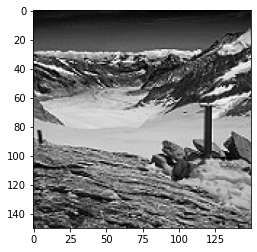

glacier



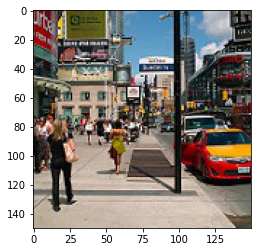

street



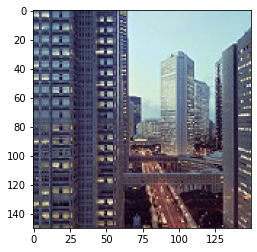

buildings



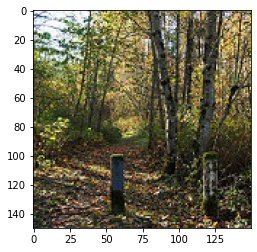

forest



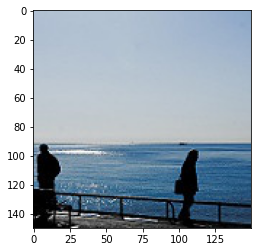

sea



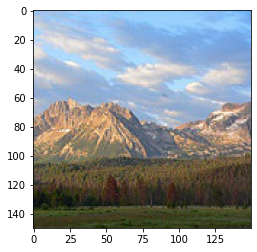

mountain



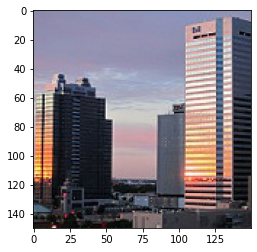

buildings



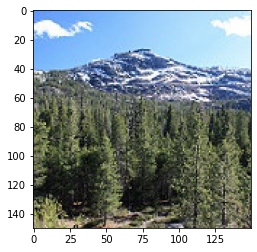

mountain



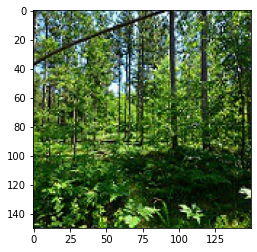

forest



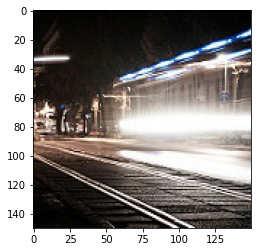

street



In [21]:
categories = {1:"buildings", 2:"forest", 3:"glacier", 4:"mountain", 5:"sea", 6:"street"}

for i in range (len(predictions)):
  prediction=np.argmax(predictions[i])+1 #because indexing starts at 0
  plt.pyplot.imshow(pred_images[i])
  #plt.pyplot.bar(categories, predictions[i])
  plt.pyplot.show()
  print(categories[prediction]+"\n")

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(test_x)
y_pred = np.argmax(y_pred1, axis=1)
test_label = np.argmax(test_y, axis = 1)

print(test_y)

# Print f1, precision, and recall scores
print(precision_score(test_label, y_pred , average="macro"))
print(recall_score(test_label, y_pred , average="macro"))
print(f1_score(test_label, y_pred , average="macro"))

94/94 [==============================] - 2s 22ms/step
[[ True False False False False False]
 [ True False False False False False]
 [ True False False False False False]
 ...
 [False False False False False  True]
 [False False False False False  True]
 [False False False False False  True]]
0.6413501265098607
0.6412553240605869
0.6327107947900682
